# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [5]:
import numpy as np

from HouseholdSpecializationModel import HouseholdSpecializationModelClass
# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject

import matplotlib.pyplot as plt # baseline module

# Predefine options for all plots
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"-"})
plt.rcParams.update({'font.size': 14})

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

**Explain how you solve the model**

In [6]:
#trying to solve
# 1. Setup
model = HouseholdSpecializationModelClass()

alpha_vec = np.linspace(0.25,0.75,3)
sigma_vec = np.linspace(0.5,1.5,3)
sol_array = np.zeros((len(alpha_vec),len(sigma_vec)))

# 2. Creating the solution
for alp_i in range(len(alpha_vec)):
    for sig_i in range(len(sigma_vec)):
        model.par.alpha = alpha_vec[alp_i]
        model.par.sigma = sigma_vec[sig_i]
        
        opt = model.solve_discrete()

        # We have to filter out whenever HM is 0 (ratio would be infinite)
        if opt.HM == 0:
            ratio = np.inf
        
        else:
            ratio = opt.HF / opt.HM
        
        print(f'(\u03B1, \u03C3) : ({alpha_vec[alp_i]:.2f}, {sigma_vec[sig_i]:.2F}) --> ratio ={ratio: .4F}')
              
#//Afterwards we can find a better way of displaying this.

c:\Users\m-fdu\OneDrive\Documents\IntroProg-lectures\projects-2023-the-best-duo-1\inauguralproject\HouseholdSpecializationModel.py:64: RuntimeWarning: divide by zero encountered in reciprocal
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)
c:\Users\m-fdu\OneDrive\Documents\IntroProg-lectures\projects-2023-the-best-duo-1\inauguralproject\HouseholdSpecializationModel.py:65: RuntimeWarning: divide by zero encountered in reciprocal
  + par.alpha*HF**((par.sigma-1)/par.sigma)) ** (par.sigma/(par.sigma-1))


(α, σ) : (0.25, 0.50) --> ratio = 0.5455
(α, σ) : (0.25, 1.00) --> ratio = 0.3077
(α, σ) : (0.25, 1.50) --> ratio = 0.2143
(α, σ) : (0.50, 0.50) --> ratio = 1.0000
(α, σ) : (0.50, 1.00) --> ratio = 1.0000
(α, σ) : (0.50, 1.50) --> ratio = 1.0000
(α, σ) : (0.75, 0.50) --> ratio = 1.8333
(α, σ) : (0.75, 1.00) --> ratio = 3.2500
(α, σ) : (0.75, 1.50) --> ratio = 4.6667


# Question 2

Explain your code and procedure

[ 0.09691001  0.          0.         -0.05115252 -0.09691001] [-0.09691001 -0.04575749  0.          0.04139269  0.07918125]


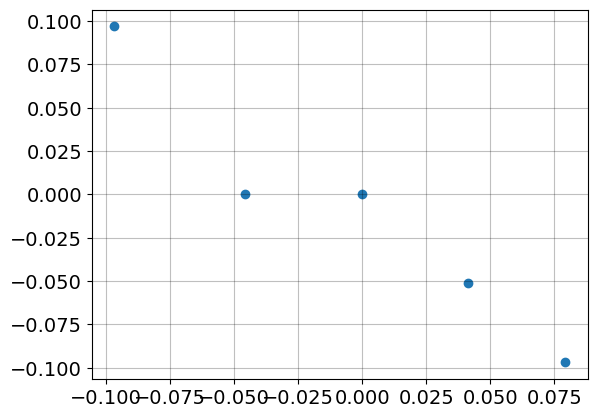

In [7]:
# a. parameter reset
model.par.alpha = 0.5
model.par.sigma = 1.0
model.par.wF_vec = [0.8, 0.9, 1.0, 1.1, 1.2]
model.par.wM_vec = np.ones(len(model.par.wF_vec))

# b. solve
sol = model.solve_wF_vec(discrete=True)

# c. log arrays
logHF_HM = np.log10(sol.HF_vec / sol.HM_vec)
logwF_wM = np.log10(model.par.wF_vec / model.par.wM_vec)


print(logHF_HM, logwF_wM)


# d. plot 
#plt.yscale(value='log')
plt.scatter(logwF_wM, logHF_HM)
plt.show()



# Question 3

Explain your code and procedure

[ 9.78029373e-02  4.23642500e-05  9.35626573e-10 -3.76973319e-05
 -8.10507540e-02] [-0.09691001 -0.04575749  0.          0.04139269  0.07918125]


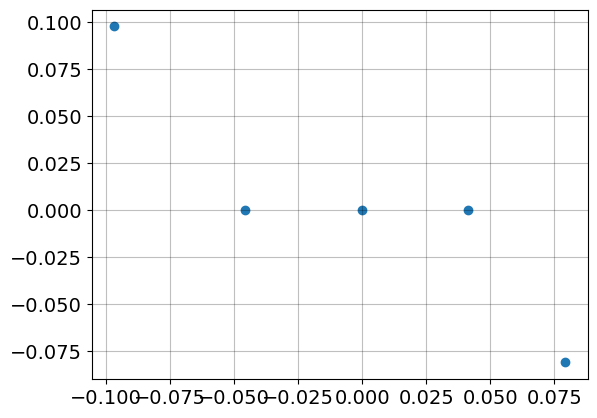

-0.8169679366486697

In [8]:
model.par.alpha = 0.5
model.par.sigma = 1.0
model.par.wF_vec = [0.8, 0.9, 1.0, 1.1, 1.2]
model.par.wM_vec = np.ones(len(model.par.wF_vec))

# b. solve
sol = model.solve_wF_vec()

# c. log arrays
logHF_HM = np.log10(sol.HF_vec / sol.HM_vec)
logwF_wM = np.log10(model.par.wF_vec / model.par.wM_vec)



print(logHF_HM, logwF_wM)


# d. plot 
#plt.yscale(value='log')
plt.scatter(logwF_wM, logHF_HM)
plt.show()

model.run_regression()
model.sol.beta0
model.sol.beta1

# Question 4

the best anwser is alpha = 1.2. sigma = 0.2, with error = 0.012300462809187614


C:\Users\m-fdu\AppData\Local\Temp\ipykernel_15656\762082991.py:8: RuntimeWarning: divide by zero encountered in divide
  plt.scatter(np.log(par.wF_vec), np.log(sol.HF_vec/sol.HM_vec), alpha=alpha_vec, label='data')


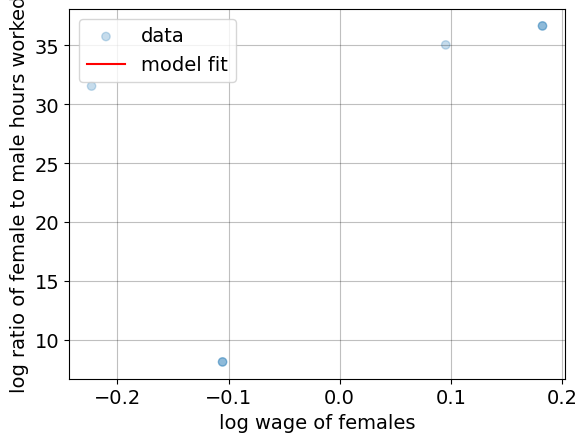

In [27]:
model.estimate()

par = model.par
sol = model.sol

# plot data 
plt.figure()
plt.scatter(np.log(par.wF_vec), np.log(sol.HF_vec/sol.HM_vec), alpha=alpha_vec, label='data')
model.solve_wF_vec()
model.run_regression()
y_model = sol.beta0 + sol.beta1 * np.log(par.wF_vec) 
plt.plot(np.log(par.wF_vec), y_model, label='model fit', color='red')
plt.xlabel('log wage of females')
plt.ylabel('log ratio of female to male hours worked')
plt.legend()
plt.show()

TST






ADD CONCISE CONLUSION.